<a href="https://colab.research.google.com/github/prasngit5/hypothesis_Assign_G4/blob/main/Hyp_6_Covid_C_vs_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import requests
response = requests.get("https://en.wikipedia.org/wiki/List_of_counties_in_Texas")
#cl= ['Smith County','Orange County','Nueces County','Young County','Shelby County','Irion County','Navarro County','Galveston County','Harris County','Parker County']
#ncl = ['Smith','Orange','Nueces','Young','Shelby','Irion','Navarro','Galveston','Harris','Parker']
d = pd.read_html(response.text)
d = d[1]
d.columns=['County Name','fips','cs','est','o','e','Population','a','m']
d = d[['County Name','Population']]
d = d.set_index('County Name')
#d = d.loc[cl]
#d['County Name'] =  ['Smith','Orange','Nueces','Young','Shelby','Irion','Navarro','Galveston','Harris','Parker']
#d = d.set_index('County Name')
#c_pop = d.loc[cl]
#c_pop['Population'][0]
c_pop = d
c_pop

,Population
County Name,
Anderson County,57922
Andrews County,18610
Angelina County,86395
Aransas County,23830
Archer County,8560
...,...
Wood County,44843
Yoakum County,7694
Young County,17867


In [ ]:
per_c = 100000 # as per requirement from the questionaire(need percapita  per 100K population)

def per_capita(r,n):
  s = (r/n)*per_c
  return s

In [ ]:
## COVID TESTS 

In [ ]:

## TESTS DAILY CUMM Testing
url3 = r"https://www.dshs.texas.gov/coronavirus/TexasCOVID-19CumulativeTestsbyCounty.xlsx"
df3 = pd.read_excel(url3)
d#f3

,Population
County Name,
Anderson County,57922
Andrews County,18610
Angelina County,86395
Aransas County,23830
Archer County,8560
...,...
Wood County,44843
Yoakum County,7694
Young County,17867


In [ ]:
df3=df3.truncate(before=0,after=254)
df3.columns = df3.iloc[0,:]
#df3.drop(df3.loc['County'])
df3 = df3.drop(df3.index[[0]])
df3

,County,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,...,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31,2021-09-01,2021-09-02,2021-09-03,2021-09-04,2021-09-05,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-11,2021-09-12,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,2021-09-18,2021-09-19,2021-09-20,2021-09-21,2021-09-22,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05
1,Anderson,26091,26113,26150,26164,26223,26264,26297,26325,26373,26461,26476,26494,26526,26537,27102,27133,27180,27198,27325,27403,27491,27620,27686,27714,27773,27961,28101,28189,28368,28552,28600,28641,28844,29027,29075,29317,29350,29371,29485,...,84227,84285,84712,85107,85484,85691,85940,86062,86565,86946,87266,87476,87642,87902,88520,88988,89328,89523,89960,90437,90887,91118,91329,91460,91757,91911,92277,92566,92982,93095,93345,93525,93759,94600,95488,95951,96142,96451,96569,96739
2,Andrews,1186,1187,1218,1222,1237,1339,1340,1341,1346,1360,1364,1367,1374,1379,1393,1451,1456,1461,1481,1504,1568,1569,1589,1592,1599,1603,1753,1759,1786,1819,1843,1854,1888,1894,1903,1915,1925,1930,1943,...,9110,9117,9121,9140,9155,9207,9234,9244,9270,9295,9316,9356,9386,9393,9507,9547,9566,9621,9665,9750,9797,9834,9856,9880,9979,10008,10035,10063,10090,10120,10136,10176,10251,10279,10297,10327,10338,10353,10362,10383
3,Angelina,14452,14503,14879,14972,15089,15214,15292,15429,15469,15543,15759,15812,15830,15838,16185,16230,16324,16367,16571,16624,16767,16792,16849,16861,16968,17037,17628,17990,18324,18705,18736,18815,18974,19091,19564,20161,20196,20211,20269,...,116777,116802,117224,118275,119599,120243,120974,121243,122050,122580,123483,124084,124411,124729,125297,125788,126469,126703,127165,127426,128185,128732,128963,129232,130549,130778,131141,131703,132116,132219,132893,133633,133894,134216,134341,134907,134980,135629,136139,136445
4,Aransas,1873,1875,1899,1926,1957,1996,2009,2023,2065,2118,2130,2138,2163,2188,2240,2249,2274,2701,2728,2756,2769,2773,2791,2795,2822,2838,2876,2893,2901,3060,3135,3239,3340,3354,3414,3433,3476,3501,3534,...,23755,23777,23840,24027,24210,24327,24446,24500,24656,24767,24906,25013,25088,25147,25268,25405,25513,25608,25779,25867,25961,26067,26232,26279,26382,26431,26623,26774,26847,26982,27060,27160,27287,27359,27472,27568,27591,27640,27710,27871
5,Archer,412,412,413,414,426,436,440,443,445,451,452,453,453,455,478,480,481,482,495,822,829,829,847,869,878,880,918,926,938,949,956,964,990,1003,1013,1015,1031,1033,1045,...,4779,4783,4789,4819,4854,4875,4896,4913,4932,4962,4972,4984,5001,5023,5063,5115,5155,5166,5185,5223,5268,5305,5327,5341,5376,5397,5422,5455,5470,5481,5510,5532,5547,5559,5571,5603,5609,5649,5677,5696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Wood,3940,3960,3984,4046,4222,4267,4285,4321,4396,4518,4532,4554,4581,4610,4822,4867,4884,4908,4946,5040,5236,5256,5285,5326,5468,5503,5564,5669,5771,5968,6095,6166,6242,6289,6342,6393,6447,6483,6554,...,32143,32217,32299,32660,33179,33506,33766,33930,34327,34757,35089,35281,35467,35569,35712,35987,36215,36385,36568,36921,37155,37422,37545,37678,37904,38023,38265,38416,38532,38583,38725,38831,38881,38978,39166,39302,39383,39557,39661,39826
251,Yoakum,932,935,1000,1004,1075,1161,1163,1165,1175,1195,1195,1229,1233,126

In [ ]:
df3.keys()
df3 = df3.set_index('County')
df3


,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,...,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31,2021-09-01,2021-09-02,2021-09-03,2021-09-04,2021-09-05,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-11,2021-09-12,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,2021-09-18,2021-09-19,2021-09-20,2021-09-21,2021-09-22,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anderson,26091,26113,26150,26164,26223,26264,26297,26325,26373,26461,26476,26494,26526,26537,27102,27133,27180,27198,27325,27403,27491,27620,27686,27714,27773,27961,28101,28189,28368,28552,28600,28641,28844,29027,29075,29317,29350,29371,29485,29843,...,84227,84285,84712,85107,85484,85691,85940,86062,86565,86946,87266,87476,87642,87902,88520,88988,89328,89523,89960,90437,90887,91118,91329,91460,91757,91911,92277,92566,92982,93095,93345,93525,93759,94600,95488,95951,96142,96451,96569,96739
Andrews,1186,1187,1218,1222,1237,1339,1340,1341,1346,1360,1364,1367,1374,1379,1393,1451,1456,1461,1481,1504,1568,1569,1589,1592,1599,1603,1753,1759,1786,1819,1843,1854,1888,1894,1903,1915,1925,1930,1943,2092,...,9110,9117,9121,9140,9155,9207,9234,9244,9270,9295,9316,9356,9386,9393,9507,9547,9566,9621,9665,9750,9797,9834,9856,9880,9979,10008,10035,10063,10090,10120,10136,10176,10251,10279,10297,10327,10338,10353,10362,10383
Angelina,14452,14503,14879,14972,15089,15214,15292,15429,15469,15543,15759,15812,15830,15838,16185,16230,16324,16367,16571,16624,16767,16792,16849,16861,16968,17037,17628,17990,18324,18705,18736,18815,18974,19091,19564,20161,20196,20211,20269,20325,...,116777,116802,117224,118275,119599,120243,120974,121243,122050,122580,123483,124084,124411,124729,125297,125788,126469,126703,127165,127426,128185,128732,128963,129232,130549,130778,131141,131703,132116,132219,132893,133633,133894,134216,134341,134907,134980,135629,136139,136445
Aransas,1873,1875,1899,1926,1957,1996,2009,2023,2065,2118,2130,2138,2163,2188,2240,2249,2274,2701,2728,2756,2769,2773,2791,2795,2822,2838,2876,2893,2901,3060,3135,3239,3340,3354,3414,3433,3476,3501,3534,3575,...,23755,23777,23840,24027,24210,24327,24446,24500,24656,24767,24906,25013,25088,25147,25268,25405,25513,25608,25779,25867,25961,26067,26232,26279,26382,26431,26623,26774,26847,26982,27060,27160,27287,27359,27472,27568,27591,27640,27710,27871
Archer,412,412,413,414,426,436,440,443,445,451,452,453,453,455,478,480,481,482,495,822,829,829,847,869,878,880,918,926,938,949,956,964,990,1003,1013,1015,1031,1033,1045,1062,...,4779,4783,4789,4819,4854,4875,4896,4913,4932,4962,4972,4984,5001,5023,5063,5115,5155,5166,5185,5223,5268,5305,5327,5341,5376,5397,5422,5455,5470,5481,5510,5532,5547,5559,5571,5603,5609,5649,5677,5696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood,3940,3960,3984,4046,4222,4267,4285,4321,4396,4518,4532,4554,4581,4610,4822,4867,4884,4908,4946,5040,5236,5256,5285,5326,5468,5503,5564,5669,5771,5968,6095,6166,6242,6289,6342,6393,6447,6483,6554,6699,...,32143,32217,32299,32660,33179,33506,33766,33930,34327,34757,35089,35281,35467,35569,35712,35987,36215,36385,36568,36921,37155,37422,37545,37678,37904,38023,38265,38416,38532,38583,38725,38831,38881,38978,391

In [ ]:
from datetime import datetime
import re
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
dat = [datetime.strptime(pattern.findall(sub)[0], '%Y-%m-%d') for sub in df3.keys()]   
dat[0:10]

[datetime.datetime(2020, 9, 13, 0, 0),
 datetime.datetime(2020, 9, 14, 0, 0),
 datetime.datetime(2020, 9, 15, 0, 0),
 datetime.datetime(2020, 9, 16, 0, 0),
 datetime.datetime(2020, 9, 17, 0, 0),
 datetime.datetime(2020, 9, 18, 0, 0),
 datetime.datetime(2020, 9, 19, 0, 0),
 datetime.datetime(2020, 9, 20, 0, 0),
 datetime.datetime(2020, 9, 21, 0, 0),
 datetime.datetime(2020, 9, 22, 0, 0)]

In [ ]:
import re
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
df3.columns=[pattern.findall(sub)[0] for sub in df3.keys()]
df3.head()

,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,...,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31,2021-09-01,2021-09-02,2021-09-03,2021-09-04,2021-09-05,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-11,2021-09-12,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,2021-09-18,2021-09-19,2021-09-20,2021-09-21,2021-09-22,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anderson,26091,26113,26150,26164,26223,26264,26297,26325,26373,26461,26476,26494,26526,26537,27102,27133,27180,27198,27325,27403,27491,27620,27686,27714,27773,27961,28101,28189,28368,28552,28600,28641,28844,29027,29075,29317,29350,29371,29485,29843,...,84227,84285,84712,85107,85484,85691,85940,86062,86565,86946,87266,87476,87642,87902,88520,88988,89328,89523,89960,90437,90887,91118,91329,91460,91757,91911,92277,92566,92982,93095,93345,93525,93759,94600,95488,95951,96142,96451,96569,96739
Andrews,1186,1187,1218,1222,1237,1339,1340,1341,1346,1360,1364,1367,1374,1379,1393,1451,1456,1461,1481,1504,1568,1569,1589,1592,1599,1603,1753,1759,1786,1819,1843,1854,1888,1894,1903,1915,1925,1930,1943,2092,...,9110,9117,9121,9140,9155,9207,9234,9244,9270,9295,9316,9356,9386,9393,9507,9547,9566,9621,9665,9750,9797,9834,9856,9880,9979,10008,10035,10063,10090,10120,10136,10176,10251,10279,10297,10327,10338,10353,10362,10383
Angelina,14452,14503,14879,14972,15089,15214,15292,15429,15469,15543,15759,15812,15830,15838,16185,16230,16324,16367,16571,16624,16767,16792,16849,16861,16968,17037,17628,17990,18324,18705,18736,18815,18974,19091,19564,20161,20196,20211,20269,20325,...,116777,116802,117224,118275,119599,120243,120974,121243,122050,122580,123483,124084,124411,124729,125297,125788,126469,126703,127165,127426,128185,128732,128963,129232,130549,130778,131141,131703,132116,132219,132893,133633,133894,134216,134341,134907,134980,135629,136139,136445
Aransas,1873,1875,1899,1926,1957,1996,2009,2023,2065,2118,2130,2138,2163,2188,2240,2249,2274,2701,2728,2756,2769,2773,2791,2795,2822,2838,2876,2893,2901,3060,3135,3239,3340,3354,3414,3433,3476,3501,3534,3575,...,23755,23777,23840,24027,24210,24327,24446,24500,24656,24767,24906,25013,25088,25147,25268,25405,25513,25608,25779,25867,25961,26067,26232,26279,26382,26431,26623,26774,26847,26982,27060,27160,27287,27359,27472,27568,27591,27640,27710,27871
Archer,412,412,413,414,426,436,440,443,445,451,452,453,453,455,478,480,481,482,495,822,829,829,847,869,878,880,918,926,938,949,956,964,990,1003,1013,1015,1031,1033,1045,1062,...,4779,4783,4789,4819,4854,4875,4896,4913,4932,4962,4972,4984,5001,5023,5063,5115,5155,5166,5185,5223,5268,5305,5327,5341,5376,5397,5422,5455,5470,5481,5510,5532,5547,5559,5571,5603,5609,5649,5677,5696


In [ ]:
#df3 = df3.loc[['Smith','Orange','Nueces','Young','Shelby','Irion','Navarro','Galveston','Harris','Parker']]
df3

,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,...,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31,2021-09-01,2021-09-02,2021-09-03,2021-09-04,2021-09-05,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-11,2021-09-12,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,2021-09-18,2021-09-19,2021-09-20,2021-09-21,2021-09-22,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anderson,26091,26113,26150,26164,26223,26264,26297,26325,26373,26461,26476,26494,26526,26537,27102,27133,27180,27198,27325,27403,27491,27620,27686,27714,27773,27961,28101,28189,28368,28552,28600,28641,28844,29027,29075,29317,29350,29371,29485,29843,...,84227,84285,84712,85107,85484,85691,85940,86062,86565,86946,87266,87476,87642,87902,88520,88988,89328,89523,89960,90437,90887,91118,91329,91460,91757,91911,92277,92566,92982,93095,93345,93525,93759,94600,95488,95951,96142,96451,96569,96739
Andrews,1186,1187,1218,1222,1237,1339,1340,1341,1346,1360,1364,1367,1374,1379,1393,1451,1456,1461,1481,1504,1568,1569,1589,1592,1599,1603,1753,1759,1786,1819,1843,1854,1888,1894,1903,1915,1925,1930,1943,2092,...,9110,9117,9121,9140,9155,9207,9234,9244,9270,9295,9316,9356,9386,9393,9507,9547,9566,9621,9665,9750,9797,9834,9856,9880,9979,10008,10035,10063,10090,10120,10136,10176,10251,10279,10297,10327,10338,10353,10362,10383
Angelina,14452,14503,14879,14972,15089,15214,15292,15429,15469,15543,15759,15812,15830,15838,16185,16230,16324,16367,16571,16624,16767,16792,16849,16861,16968,17037,17628,17990,18324,18705,18736,18815,18974,19091,19564,20161,20196,20211,20269,20325,...,116777,116802,117224,118275,119599,120243,120974,121243,122050,122580,123483,124084,124411,124729,125297,125788,126469,126703,127165,127426,128185,128732,128963,129232,130549,130778,131141,131703,132116,132219,132893,133633,133894,134216,134341,134907,134980,135629,136139,136445
Aransas,1873,1875,1899,1926,1957,1996,2009,2023,2065,2118,2130,2138,2163,2188,2240,2249,2274,2701,2728,2756,2769,2773,2791,2795,2822,2838,2876,2893,2901,3060,3135,3239,3340,3354,3414,3433,3476,3501,3534,3575,...,23755,23777,23840,24027,24210,24327,24446,24500,24656,24767,24906,25013,25088,25147,25268,25405,25513,25608,25779,25867,25961,26067,26232,26279,26382,26431,26623,26774,26847,26982,27060,27160,27287,27359,27472,27568,27591,27640,27710,27871
Archer,412,412,413,414,426,436,440,443,445,451,452,453,453,455,478,480,481,482,495,822,829,829,847,869,878,880,918,926,938,949,956,964,990,1003,1013,1015,1031,1033,1045,1062,...,4779,4783,4789,4819,4854,4875,4896,4913,4932,4962,4972,4984,5001,5023,5063,5115,5155,5166,5185,5223,5268,5305,5327,5341,5376,5397,5422,5455,5470,5481,5510,5532,5547,5559,5571,5603,5609,5649,5677,5696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood,3940,3960,3984,4046,4222,4267,4285,4321,4396,4518,4532,4554,4581,4610,4822,4867,4884,4908,4946,5040,5236,5256,5285,5326,5468,5503,5564,5669,5771,5968,6095,6166,6242,6289,6342,6393,6447,6483,6554,6699,...,32143,32217,32299,32660,33179,33506,33766,33930,34327,34757,35089,35281,35467,35569,35712,35987,36215,36385,36568,36921,37155,37422,37545,37678,37904,38023,38265,38416,38532,38583,38725,38831,38881,38978,391

In [ ]:
#Converting %Y-%m-%d format into %m-%d-%Y
cr_date = [(datetime.strptime(c, '%Y-%m-%d')).strftime("%m-%d-%Y") for c in df3.columns]
df3.columns = [cr_date]
df3

,09-13-2020,09-14-2020,09-15-2020,09-16-2020,09-17-2020,09-18-2020,09-19-2020,09-20-2020,09-21-2020,09-22-2020,09-23-2020,09-24-2020,09-25-2020,09-26-2020,09-27-2020,09-28-2020,09-29-2020,09-30-2020,10-01-2020,10-02-2020,10-03-2020,10-04-2020,10-05-2020,10-06-2020,10-07-2020,10-08-2020,10-09-2020,10-10-2020,10-11-2020,10-12-2020,10-13-2020,10-14-2020,10-15-2020,10-16-2020,10-17-2020,10-18-2020,10-19-2020,10-20-2020,10-21-2020,10-22-2020,...,08-27-2021,08-28-2021,08-29-2021,08-30-2021,08-31-2021,09-01-2021,09-02-2021,09-03-2021,09-04-2021,09-05-2021,09-06-2021,09-07-2021,09-08-2021,09-09-2021,09-10-2021,09-11-2021,09-12-2021,09-13-2021,09-14-2021,09-15-2021,09-16-2021,09-17-2021,09-18-2021,09-19-2021,09-20-2021,09-21-2021,09-22-2021,09-23-2021,09-24-2021,09-25-2021,09-26-2021,09-27-2021,09-28-2021,09-29-2021,09-30-2021,10-01-2021,10-02-2021,10-03-2021,10-04-2021,10-05-2021
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anderson,26091,26113,26150,26164,26223,26264,26297,26325,26373,26461,26476,26494,26526,26537,27102,27133,27180,27198,27325,27403,27491,27620,27686,27714,27773,27961,28101,28189,28368,28552,28600,28641,28844,29027,29075,29317,29350,29371,29485,29843,...,84227,84285,84712,85107,85484,85691,85940,86062,86565,86946,87266,87476,87642,87902,88520,88988,89328,89523,89960,90437,90887,91118,91329,91460,91757,91911,92277,92566,92982,93095,93345,93525,93759,94600,95488,95951,96142,96451,96569,96739
Andrews,1186,1187,1218,1222,1237,1339,1340,1341,1346,1360,1364,1367,1374,1379,1393,1451,1456,1461,1481,1504,1568,1569,1589,1592,1599,1603,1753,1759,1786,1819,1843,1854,1888,1894,1903,1915,1925,1930,1943,2092,...,9110,9117,9121,9140,9155,9207,9234,9244,9270,9295,9316,9356,9386,9393,9507,9547,9566,9621,9665,9750,9797,9834,9856,9880,9979,10008,10035,10063,10090,10120,10136,10176,10251,10279,10297,10327,10338,10353,10362,10383
Angelina,14452,14503,14879,14972,15089,15214,15292,15429,15469,15543,15759,15812,15830,15838,16185,16230,16324,16367,16571,16624,16767,16792,16849,16861,16968,17037,17628,17990,18324,18705,18736,18815,18974,19091,19564,20161,20196,20211,20269,20325,...,116777,116802,117224,118275,119599,120243,120974,121243,122050,122580,123483,124084,124411,124729,125297,125788,126469,126703,127165,127426,128185,128732,128963,129232,130549,130778,131141,131703,132116,132219,132893,133633,133894,134216,134341,134907,134980,135629,136139,136445
Aransas,1873,1875,1899,1926,1957,1996,2009,2023,2065,2118,2130,2138,2163,2188,2240,2249,2274,2701,2728,2756,2769,2773,2791,2795,2822,2838,2876,2893,2901,3060,3135,3239,3340,3354,3414,3433,3476,3501,3534,3575,...,23755,23777,23840,24027,24210,24327,24446,24500,24656,24767,24906,25013,25088,25147,25268,25405,25513,25608,25779,25867,25961,26067,26232,26279,26382,26431,26623,26774,26847,26982,27060,27160,27287,27359,27472,27568,27591,27640,27710,27871
Archer,412,412,413,414,426,436,440,443,445,451,452,453,453,455,478,480,481,482,495,822,829,829,847,869,878,880,918,926,938,949,956,964,990,1003,1013,1015,1031,1033,1045,1062,...,4779,4783,4789,4819,4854,4875,4896,4913,4932,4962,4972,4984,5001,5023,5063,5115,5155,5166,5185,5223,5268,5305,5327,5341,5376,5397,5422,5455,5470,5481,5510,5532,5547,5559,5571,5603,5609,5649,5677,5696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood,3940,3960,3984,4046,4222,4267,4285,4321,4396,4518,4532,4554,4581,4610,4822,4867,4884,4908,4946,5040,5236,5256,5285,5326,5468,5503,5564,5669,5771,5968,6095,6166,6242,6289,6342,6393,6447,6483,6554,6699,...,32143,32217,32299,32660,33179,33506,33766,33930,34327,34757,35089,35281,35467,35569,35712,35987,36215,36385,36568,36921,37155,37422,37545,37678,37904,38023,38265,38416,38532,38583,38725,38831,38881,38978,391

In [ ]:
###### Percapita

In [ ]:
df3.keys()

MultiIndex([('09-13-2020',),
            ('09-14-2020',),
            ('09-15-2020',),
            ('09-16-2020',),
            ('09-17-2020',),
            ('09-18-2020',),
            ('09-19-2020',),
            ('09-20-2020',),
            ('09-21-2020',),
            ('09-22-2020',),
            ...
            ('09-26-2021',),
            ('09-27-2021',),
            ('09-28-2021',),
            ('09-29-2021',),
            ('09-30-2021',),
            ('10-01-2021',),
            ('10-02-2021',),
            ('10-03-2021',),
            ('10-04-2021',),
            ('10-05-2021',)],
           length=388)

In [ ]:
c_pop.keys()

Index(['Population'], dtype='object')

In [ ]:
c_pop["County Name"] =  df3.index.values.tolist()
c_pop.reset_index(drop=True, inplace=True)
columns_titles = ["County Name","Population"]
c_pop=c_pop.reindex(columns=columns_titles)
c_pop.set_index('County Name',inplace=True)
#pop.keys()
c_pop

,Population
County Name,
Anderson,57922
Andrews,18610
Angelina,86395
Aransas,23830
Archer,8560
...,...
Wood,44843
Yoakum,7694
Young,17867


In [ ]:
for i in df3.index:
  df3.loc[i] = df3.loc[i].apply(per_capita,args=(c_pop['Population'][i],))
  
df3

,09-13-2020,09-14-2020,09-15-2020,09-16-2020,09-17-2020,09-18-2020,09-19-2020,09-20-2020,09-21-2020,09-22-2020,09-23-2020,09-24-2020,09-25-2020,09-26-2020,09-27-2020,09-28-2020,09-29-2020,09-30-2020,10-01-2020,10-02-2020,10-03-2020,10-04-2020,10-05-2020,10-06-2020,10-07-2020,10-08-2020,10-09-2020,10-10-2020,10-11-2020,10-12-2020,10-13-2020,10-14-2020,10-15-2020,10-16-2020,10-17-2020,10-18-2020,10-19-2020,10-20-2020,10-21-2020,10-22-2020,...,08-27-2021,08-28-2021,08-29-2021,08-30-2021,08-31-2021,09-01-2021,09-02-2021,09-03-2021,09-04-2021,09-05-2021,09-06-2021,09-07-2021,09-08-2021,09-09-2021,09-10-2021,09-11-2021,09-12-2021,09-13-2021,09-14-2021,09-15-2021,09-16-2021,09-17-2021,09-18-2021,09-19-2021,09-20-2021,09-21-2021,09-22-2021,09-23-2021,09-24-2021,09-25-2021,09-26-2021,09-27-2021,09-28-2021,09-29-2021,09-30-2021,10-01-2021,10-02-2021,10-03-2021,10-04-2021,10-05-2021
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anderson,45045.1,45083,45146.9,45171.1,45273,45343.7,45400.7,45449.1,45531.9,45683.9,45709.7,45740.8,45796.1,45815.1,46790.5,46844,46925.2,46956.3,47175.5,47310.2,47462.1,47684.8,47798.8,47847.1,47949,48273.5,48515.2,48667.2,48976.2,49293.9,49376.7,49447.5,49798,50113.9,50196.8,50614.6,50671.6,50707.8,50904.7,51522.7,...,145415,145515,146252,146934,147585,147942,148372,148583,149451,150109,150661,151024,151310,151759,152826,153634,154221,154558,155312,156136,156913,157312,157676,157902,158415,158681,159313,159811,160530,160725,161156,161467,161871,163323,164856,165656,165985,166519,166722,167016
Andrews,6372.92,6378.29,6544.87,6566.36,6646.96,7195.06,7200.43,7205.8,7232.67,7307.9,7329.39,7345.51,7383.13,7409.99,7485.22,7796.88,7823.75,7850.62,7958.09,8081.68,8425.58,8430.95,8538.42,8554.54,8592.15,8613.65,9419.67,9451.91,9596.99,9774.31,9903.28,9962.39,10145.1,10177.3,10225.7,10290.2,10343.9,10370.8,10440.6,11241.3,...,48952.2,48989.8,49011.3,49113.4,49194,49473.4,49618.5,49672.2,49811.9,49946.3,50059.1,50274,50435.2,50472.9,51085.4,51300.4,51402.5,51698,51934.4,52391.2,52643.7,52842.6,52960.8,53089.7,53621.7,53777.5,53922.6,54073.1,54218.2,54379.4,54465.3,54680.3,55083.3,55233.7,55330.5,55491.7,55550.8,55631.4,55679.7,55792.6
Angelina,16727.8,16786.9,17222.1,17329.7,17465.1,17609.8,17700.1,17858.7,17905,17990.6,18240.6,18302,18322.8,18332.1,18733.7,18785.8,18894.6,18944.4,19180.5,19241.9,19407.4,19436.3,19502.3,19516.2,19640,19719.9,20404,20823,21209.6,21650.6,21686.4,21777.9,21961.9,22097.3,22644.8,23335.8,23376.4,23393.7,23460.8,23525.7,...,135166,135195,135684,136900,138433,139178,140024,140336,141270,141883,142928,143624,144003,144371,145028,145596,146385,146655,147190,147492,148371,149004,149271,149583,151107,151372,151792,152443,152921,153040,153820,154677,154979,155352,155496,156151,156236,156987,157577,157932
Aransas,7859.84,7868.23,7968.95,8082.25,8212.34,8376,8430.55,8489.3,8665.55,8887.96,8938.31,8971.88,9076.79,9181.7,9399.92,9437.68,9542.59,11334.5,11447.8,11565.3,11619.8,11636.6,11712.1,11728.9,11842.2,11909.4,12068.8,12140.2,12173.7,12841,13155.7,13592.1,14015.9,14074.7,14326.5,14406.2,14586.7,14691.6,14830,15002.1,...,99685.3,99777.6,100042,100827,101595,102086,102585,102812,103466,103932,104515,104964,105279,105527,106034,106609,107063,107461,108179,108548,108943,109387,110080,110277,110709,110915,111721,112354,112661,113227,113554,113974,114507,114809,115283,115686,115783,115988,116282,116958
Archer,4813.08,4813.08,4824.77,4836.45,4976.64,5093.46,5140.19,5175.23,5198.6,5268.69,5280.37,5292.06,5292.06,5315.42,5584.11,5607.48,5619.16,5630.84,5782.71,9602.8,9684.58,9684.58,9894.86,10151.9,10257,10280.4,10724.3,10817.8,10957.9,11086.4,11168.2,11261.7,11565.4,11717.3,11834.1,11857.5,12044.4,12067.8,12207.9,12406.5,...,55829.4,55876.2,55946.3,56296.7,56705.6,56950.9,57196.3,57394.9,57616.8,57967.3,58084.1,58224.3,58422.9,58679.9,59147.2,59754.7,60222,60350.5,60572.4,61016.4,61542.1,61974.3,62231.3,62394.9,62803.7,63049.1,63341.1,63726.6,63901.9,64030.4,64369.2

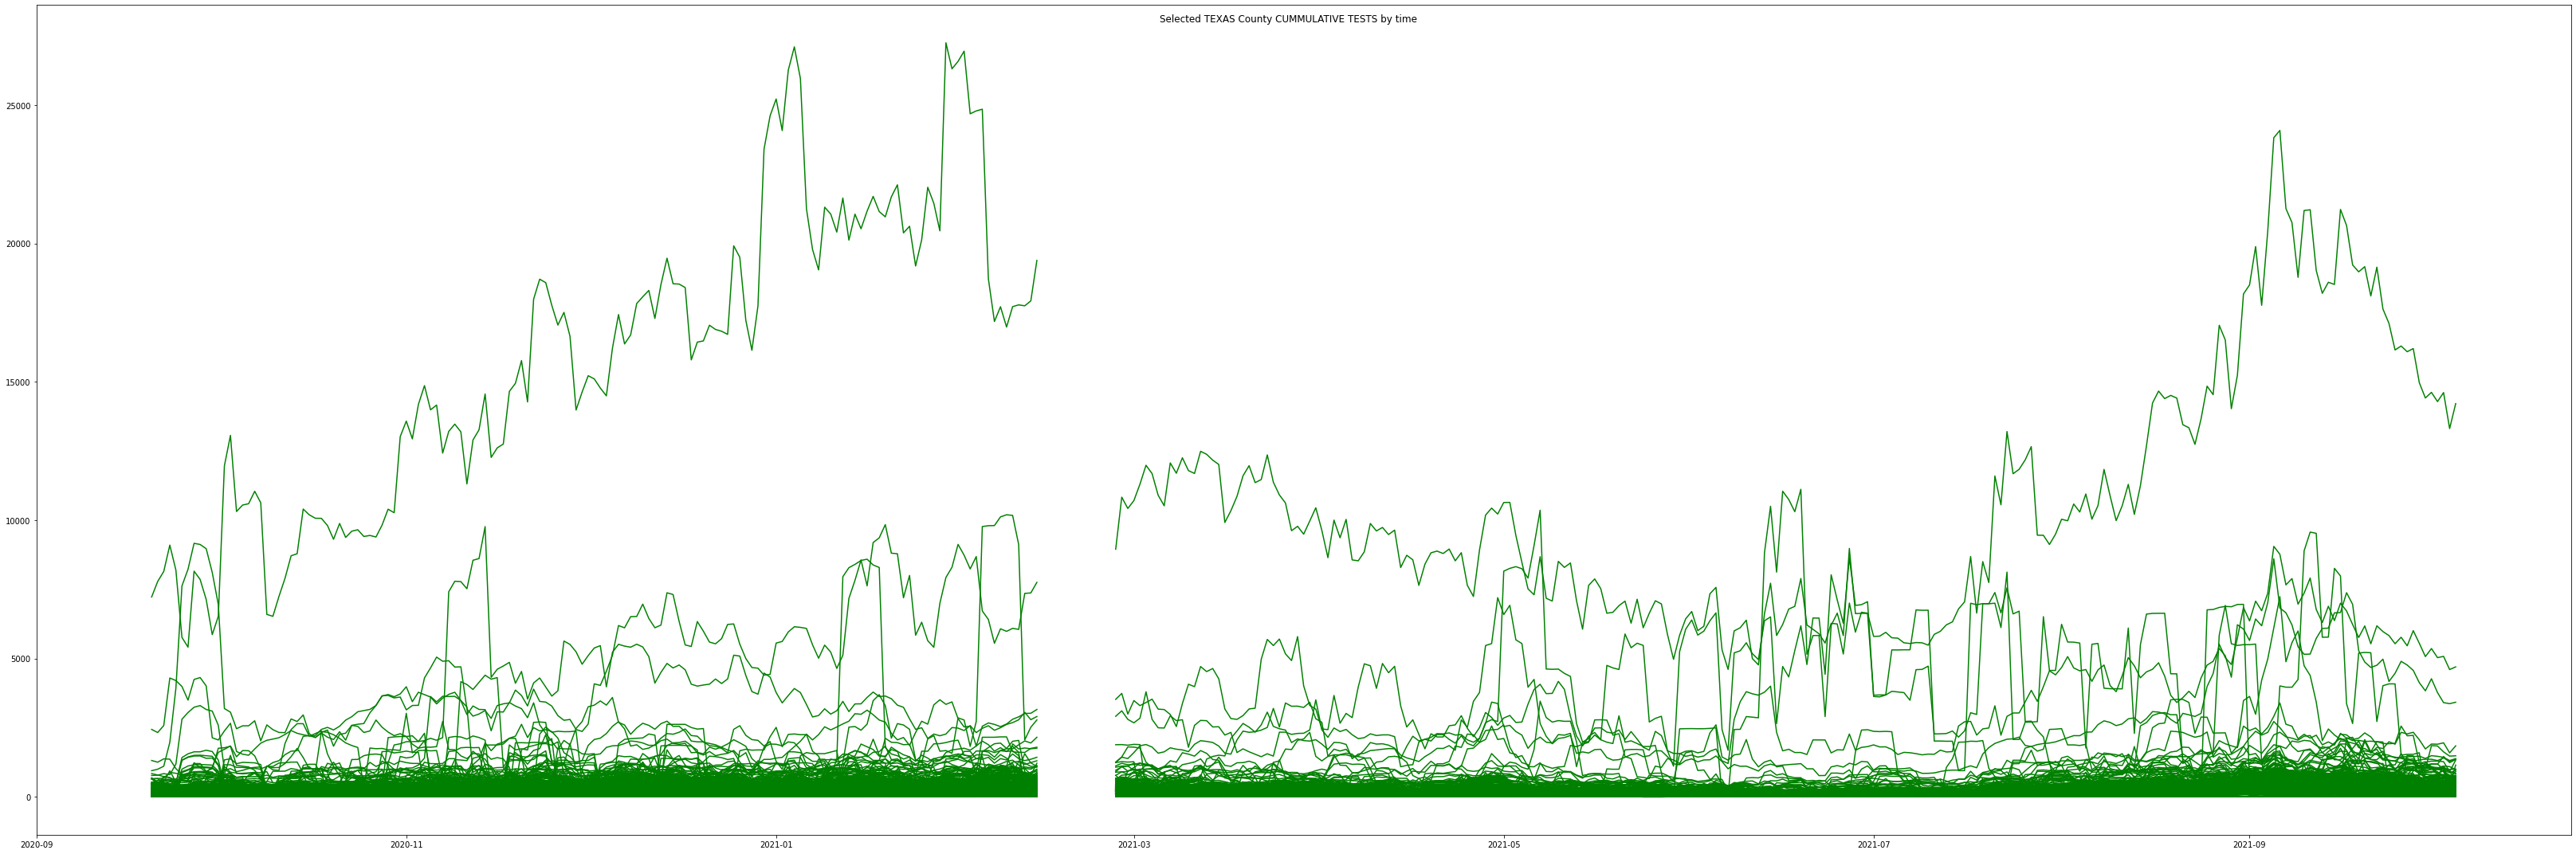

In [ ]:
#c_l =['Smith','Orange','Nueces','Young','Shelby','Irion','Navarro','Galveston','Harris','Parker']
#ct = df3.copy()
#mydf =df3
l = df3.index.values.tolist()
fig = plt.figure(figsize=(45,15))

plt.plot(dat,df3.T.diff().rolling(window=7).mean(),label= '7-day average CUMM Tests',color='green')

fig.tight_layout()
fig.suptitle('Selected TEXAS County CUMMULATIVE TESTS by time')
#plt.savefig("TX_10_County_Covid_daily_update.png", dpi=60)
plt.show()

In [ ]:
import pandas as pd
url = "https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyCaseCountData.xlsx" #  sheets 'COVID-19 Cases', 'COVID-19 Fatalities'
df = pd.read_excel(url , sheet_name = 'Cases by County',skiprows=2)
df.head()

,County Name,Cases 03-04-2020,Cases 03-05-2020,Cases 03-06-2020,Cases 03-07-2020,Cases 03-08-2020,Cases 03-09-2020,Cases 03-10-2020,Cases 03-11-2020,Cases 03-12-2020,Cases 03-13-2020,Cases 03-14-2020,Cases 03-15-2020,Cases 03-16-2020,Cases 03-17-2020,Cases 03-18-2020,Cases 03-19-2020,Cases 03-20-2020,Cases 03-21-2020,Cases 03-22-2020,Cases 03-23-2020,Cases 03-24-2020,Cases 03-25-2020,Cases 03-26-2020,Cases 03-27-2020,Cases 03-28-2020,Cases 03-29-2020,Cases 03-30-2020,Cases 03-31-2020,Cases 04-01-2020,Cases 04-02-2020,Cases 04-03-2020,Cases 04-04-2020,Cases 04-05-2020,Cases 04-06-2020,Cases 04-07-2020,Cases 04-08-2020,Cases 04-09-2020,Cases 04-10-2020,Cases 04-11-2020,...,Cases 08-28-2021,Cases 08-29-2021,Cases 08-30-2021,Cases 08-31-2021,Cases 09-01-2021,Cases 09-02-2021,Cases 09-03-2021,Cases 09-04-2021,Cases 09-05-2021,Cases 09-06-2021,Cases 09-07-2021,Cases 09-08-2021,Cases 09-09-2021,Cases 09-10-2021,Cases 09-11-2021,Cases 09-12-2021,Cases 09-13-2021,Cases 09-14-2021,Cases 09-15-2021,Cases 09-16-2021,Cases 09-17-2021,Cases 09-18-2021,Cases 09-19-2021,Cases 09-20-2021,Cases 09-21-2021,Cases 09-22-2021,Cases 09-23-2021,Cases 09-24-2021,Cases 09-25-2021,Cases 09-26-2021,Cases 09-27-2021,Cases 09-28-2021,Cases 09-29-2021,Cases 09-30-2021,Cases 10-01-2021,Cases 10-02-2021,Cases 10-03-2021,Cases 10-04-2021,Cases 10-05-2021,Cases 10-06-2021
0,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,...,4812.0,4812.0,4812.0,4828.0,4816.0,4816.0,4866.0,4866.0,4866.0,4866.0,4866.0,4878.0,4837.0,4894.0,4889.0,4889.0,4889.0,4919.0,4901.0,4902.0,4923.0,4919.0,4919.0,4919.0,4924.0,4931.0,4928.0,4959.0,4958.0,4958.0,4958.0,4954.0,4955.0,4957.0,4993.0,4993.0,4993.0,4993.0,5005.0,5009.0
1,Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,10.0,10.0,10.0,11.0,11.0,...,2069.0,2069.0,2069.0,2069.0,2069.0,2069.0,2069.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2575.0,2575.0,2575.0,2575.0,2591.0,2591.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2665.0,2688.0,2688.0,2688.0,2688.0,2688.0,2719.0
2,Angelina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,4.0,5.0,5.0,8.0,10.0,10.0,14.0,14.0,14.0,15.0,16.0,16.0,...,5799.0,5799.0,5799.0,5799.0,5821.0,5821.0,5955.0,5955.0,5955.0,5955.0,5955.0,5955.0,6086.0,6086.0,6086.0,6086.0,6086.0,6086.0,6086.0,6278.0,6278.0,6307.0,6307.0,6307.0,6384.0,6384.0,6384.0,6495.0,6495.0,6495.0,6495.0,6546.0,6577.0,6577.0,6577.0,6577.0,6577.0,6577.0,6627.0,6627.0
3,Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,1472.0,1477.0,1477.0,1499.0,1533.0,1559.0,1587.0,1616.0,1629.0,1629.0,1629.0,1713.0,1740.0,1759.0,1775.0,1780.0,1780.0,1798.0,1823.0,1828.0,1861.0,1872.0,1881.0,1881.0,1889.0,1891.0,1898.0,1900.0,1902.0,1910.0,1910.0,1920.0,1937.0,1942.0,1942.0,1949.0,1951.0,1951.0,1955.0,1958.0
4,Archer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,798.0,798.0,798.0,832.0,834.0,842.0,848.0,853.0,853.0,853.0,853.0,866.0,871.0,871.0,874.0,874.0,874.0,885.0,890.0,895.0,899.0,910.0,910.0,910.0,923.0,924.0,925.0,925.0,931.0,931.0,931.0,937.0,940.0,945.0,951.0,958.0,958.0,958.0,968.0,1004.0


In [ ]:
df=df.truncate(before=0,after=253)  # There are extra rows in the file, just remove, should look for last county, but this is easier
df

,County Name,Cases 03-04-2020,Cases 03-05-2020,Cases 03-06-2020,Cases 03-07-2020,Cases 03-08-2020,Cases 03-09-2020,Cases 03-10-2020,Cases 03-11-2020,Cases 03-12-2020,Cases 03-13-2020,Cases 03-14-2020,Cases 03-15-2020,Cases 03-16-2020,Cases 03-17-2020,Cases 03-18-2020,Cases 03-19-2020,Cases 03-20-2020,Cases 03-21-2020,Cases 03-22-2020,Cases 03-23-2020,Cases 03-24-2020,Cases 03-25-2020,Cases 03-26-2020,Cases 03-27-2020,Cases 03-28-2020,Cases 03-29-2020,Cases 03-30-2020,Cases 03-31-2020,Cases 04-01-2020,Cases 04-02-2020,Cases 04-03-2020,Cases 04-04-2020,Cases 04-05-2020,Cases 04-06-2020,Cases 04-07-2020,Cases 04-08-2020,Cases 04-09-2020,Cases 04-10-2020,Cases 04-11-2020,...,Cases 08-28-2021,Cases 08-29-2021,Cases 08-30-2021,Cases 08-31-2021,Cases 09-01-2021,Cases 09-02-2021,Cases 09-03-2021,Cases 09-04-2021,Cases 09-05-2021,Cases 09-06-2021,Cases 09-07-2021,Cases 09-08-2021,Cases 09-09-2021,Cases 09-10-2021,Cases 09-11-2021,Cases 09-12-2021,Cases 09-13-2021,Cases 09-14-2021,Cases 09-15-2021,Cases 09-16-2021,Cases 09-17-2021,Cases 09-18-2021,Cases 09-19-2021,Cases 09-20-2021,Cases 09-21-2021,Cases 09-22-2021,Cases 09-23-2021,Cases 09-24-2021,Cases 09-25-2021,Cases 09-26-2021,Cases 09-27-2021,Cases 09-28-2021,Cases 09-29-2021,Cases 09-30-2021,Cases 10-01-2021,Cases 10-02-2021,Cases 10-03-2021,Cases 10-04-2021,Cases 10-05-2021,Cases 10-06-2021
0,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,...,4812.0,4812.0,4812.0,4828.0,4816.0,4816.0,4866.0,4866.0,4866.0,4866.0,4866.0,4878.0,4837.0,4894.0,4889.0,4889.0,4889.0,4919.0,4901.0,4902.0,4923.0,4919.0,4919.0,4919.0,4924.0,4931.0,4928.0,4959.0,4958.0,4958.0,4958.0,4954.0,4955.0,4957.0,4993.0,4993.0,4993.0,4993.0,5005.0,5009.0
1,Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,10.0,10.0,10.0,11.0,11.0,...,2069.0,2069.0,2069.0,2069.0,2069.0,2069.0,2069.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2575.0,2575.0,2575.0,2575.0,2591.0,2591.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2665.0,2688.0,2688.0,2688.0,2688.0,2688.0,2719.0
2,Angelina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,4.0,5.0,5.0,8.0,10.0,10.0,14.0,14.0,14.0,15.0,16.0,16.0,...,5799.0,5799.0,5799.0,5799.0,5821.0,5821.0,5955.0,5955.0,5955.0,5955.0,5955.0,5955.0,6086.0,6086.0,6086.0,6086.0,6086.0,6086.0,6086.0,6278.0,6278.0,6307.0,6307.0,6307.0,6384.0,6384.0,6384.0,6495.0,6495.0,6495.0,6495.0,6546.0,6577.0,6577.0,6577.0,6577.0,6577.0,6577.0,6627.0,6627.0
3,Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,1472.0,1477.0,1477.0,1499.0,1533.0,1559.0,1587.0,1616.0,1629.0,1629.0,1629.0,1713.0,1740.0,1759.0,1775.0,1780.0,1780.0,1798.0,1823.0,1828.0,1861.0,1872.0,1881.0,1881.0,1889.0,1891.0,1898.0,1900.0,1902.0,1910.0,1910.0,1920.0,1937.0,1942.0,1942.0,1949.0,1951.0,1951.0,1955.0,1958.0
4,Archer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,798.0,798.0,798.0,832.0,834.0,842.0,848.0,853.0,853.0,853.0,853.0,866.0,871.0,871.0,874.0,874.0,874.0,885.0,890.0,895.0,899.0,910.0,910.0,910.0,923.0,924.0,925.0,925.0,931.0,931.0,931.0,937.0,940.0,945.0,951.0,958.0,958.0,958.0,968.0,1004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
df.keys()

Index(['County Name', 'Cases 03-04-2020', 'Cases 03-05-2020',
       'Cases 03-06-2020', 'Cases 03-07-2020', 'Cases 03-08-2020',
       'Cases 03-09-2020', 'Cases 03-10-2020', 'Cases 03-11-2020',
       'Cases 03-12-2020',
       ...
       'Cases 09-27-2021', 'Cases 09-28-2021', 'Cases 09-29-2021',
       'Cases 09-30-2021', 'Cases 10-01-2021', 'Cases 10-02-2021',
       'Cases 10-03-2021', 'Cases 10-04-2021', 'Cases 10-05-2021',
       'Cases 10-06-2021'],
      dtype='object', length=583)

In [ ]:
df = df.set_index('County Name')
df

,Cases 03-04-2020,Cases 03-05-2020,Cases 03-06-2020,Cases 03-07-2020,Cases 03-08-2020,Cases 03-09-2020,Cases 03-10-2020,Cases 03-11-2020,Cases 03-12-2020,Cases 03-13-2020,Cases 03-14-2020,Cases 03-15-2020,Cases 03-16-2020,Cases 03-17-2020,Cases 03-18-2020,Cases 03-19-2020,Cases 03-20-2020,Cases 03-21-2020,Cases 03-22-2020,Cases 03-23-2020,Cases 03-24-2020,Cases 03-25-2020,Cases 03-26-2020,Cases 03-27-2020,Cases 03-28-2020,Cases 03-29-2020,Cases 03-30-2020,Cases 03-31-2020,Cases 04-01-2020,Cases 04-02-2020,Cases 04-03-2020,Cases 04-04-2020,Cases 04-05-2020,Cases 04-06-2020,Cases 04-07-2020,Cases 04-08-2020,Cases 04-09-2020,Cases 04-10-2020,Cases 04-11-2020,Cases 04-12-2020,...,Cases 08-28-2021,Cases 08-29-2021,Cases 08-30-2021,Cases 08-31-2021,Cases 09-01-2021,Cases 09-02-2021,Cases 09-03-2021,Cases 09-04-2021,Cases 09-05-2021,Cases 09-06-2021,Cases 09-07-2021,Cases 09-08-2021,Cases 09-09-2021,Cases 09-10-2021,Cases 09-11-2021,Cases 09-12-2021,Cases 09-13-2021,Cases 09-14-2021,Cases 09-15-2021,Cases 09-16-2021,Cases 09-17-2021,Cases 09-18-2021,Cases 09-19-2021,Cases 09-20-2021,Cases 09-21-2021,Cases 09-22-2021,Cases 09-23-2021,Cases 09-24-2021,Cases 09-25-2021,Cases 09-26-2021,Cases 09-27-2021,Cases 09-28-2021,Cases 09-29-2021,Cases 09-30-2021,Cases 10-01-2021,Cases 10-02-2021,Cases 10-03-2021,Cases 10-04-2021,Cases 10-05-2021,Cases 10-06-2021
County Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,...,4812.0,4812.0,4812.0,4828.0,4816.0,4816.0,4866.0,4866.0,4866.0,4866.0,4866.0,4878.0,4837.0,4894.0,4889.0,4889.0,4889.0,4919.0,4901.0,4902.0,4923.0,4919.0,4919.0,4919.0,4924.0,4931.0,4928.0,4959.0,4958.0,4958.0,4958.0,4954.0,4955.0,4957.0,4993.0,4993.0,4993.0,4993.0,5005.0,5009.0
Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,10.0,10.0,10.0,11.0,11.0,11.0,...,2069.0,2069.0,2069.0,2069.0,2069.0,2069.0,2069.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2575.0,2575.0,2575.0,2575.0,2591.0,2591.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2665.0,2688.0,2688.0,2688.0,2688.0,2688.0,2719.0
Angelina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,4.0,5.0,5.0,8.0,10.0,10.0,14.0,14.0,14.0,15.0,16.0,16.0,16.0,...,5799.0,5799.0,5799.0,5799.0,5821.0,5821.0,5955.0,5955.0,5955.0,5955.0,5955.0,5955.0,6086.0,6086.0,6086.0,6086.0,6086.0,6086.0,6086.0,6278.0,6278.0,6307.0,6307.0,6307.0,6384.0,6384.0,6384.0,6495.0,6495.0,6495.0,6495.0,6546.0,6577.0,6577.0,6577.0,6577.0,6577.0,6577.0,6627.0,6627.0
Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1472.0,1477.0,1477.0,1499.0,1533.0,1559.0,1587.0,1616.0,1629.0,1629.0,1629.0,1713.0,1740.0,1759.0,1775.0,1780.0,1780.0,1798.0,1823.0,1828.0,1861.0,1872.0,1881.0,1881.0,1889.0,1891.0,1898.0,1900.0,1902.0,1910.0,1910.0,1920.0,1937.0,1942.0,1942.0,1949.0,1951.0,1951.0,1955.0,1958.0
Archer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,798.0,798.0,798.0,832.0,834.0,842.0,848.0,853.0,853.0,853.0,853.0,866.0,871.0,871.0,874.0,874.0,874.0,885.0,890.0,895.0,899.0,910.0,910.0,910.0,923.0,924.0,925.0,925.0,931.0,931.0,931.0,937.0,940.0,945.0,951.0,958.0,958.0,958.0,968.0,1004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
from datetime import datetime
import re
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d-%Y') for sub in df.keys()]   
dates[0:10]

[datetime.datetime(2020, 3, 4, 0, 0),
 datetime.datetime(2020, 3, 5, 0, 0),
 datetime.datetime(2020, 3, 6, 0, 0),
 datetime.datetime(2020, 3, 7, 0, 0),
 datetime.datetime(2020, 3, 8, 0, 0),
 datetime.datetime(2020, 3, 9, 0, 0),
 datetime.datetime(2020, 3, 10, 0, 0),
 datetime.datetime(2020, 3, 11, 0, 0),
 datetime.datetime(2020, 3, 12, 0, 0),
 datetime.datetime(2020, 3, 13, 0, 0)]

In [ ]:
import re

pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
df.columns=[pattern.findall(sub)[0] for sub in df.keys()]
df.head()

,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020,03-30-2020,03-31-2020,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,04-09-2020,04-10-2020,04-11-2020,04-12-2020,...,08-28-2021,08-29-2021,08-30-2021,08-31-2021,09-01-2021,09-02-2021,09-03-2021,09-04-2021,09-05-2021,09-06-2021,09-07-2021,09-08-2021,09-09-2021,09-10-2021,09-11-2021,09-12-2021,09-13-2021,09-14-2021,09-15-2021,09-16-2021,09-17-2021,09-18-2021,09-19-2021,09-20-2021,09-21-2021,09-22-2021,09-23-2021,09-24-2021,09-25-2021,09-26-2021,09-27-2021,09-28-2021,09-29-2021,09-30-2021,10-01-2021,10-02-2021,10-03-2021,10-04-2021,10-05-2021,10-06-2021
County Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,...,4812.0,4812.0,4812.0,4828.0,4816.0,4816.0,4866.0,4866.0,4866.0,4866.0,4866.0,4878.0,4837.0,4894.0,4889.0,4889.0,4889.0,4919.0,4901.0,4902.0,4923.0,4919.0,4919.0,4919.0,4924.0,4931.0,4928.0,4959.0,4958.0,4958.0,4958.0,4954.0,4955.0,4957.0,4993.0,4993.0,4993.0,4993.0,5005.0,5009.0
Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,10.0,10.0,10.0,11.0,11.0,11.0,...,2069.0,2069.0,2069.0,2069.0,2069.0,2069.0,2069.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2280.0,2575.0,2575.0,2575.0,2575.0,2591.0,2591.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2665.0,2688.0,2688.0,2688.0,2688.0,2688.0,2719.0
Angelina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,4.0,5.0,5.0,8.0,10.0,10.0,14.0,14.0,14.0,15.0,16.0,16.0,16.0,...,5799.0,5799.0,5799.0,5799.0,5821.0,5821.0,5955.0,5955.0,5955.0,5955.0,5955.0,5955.0,6086.0,6086.0,6086.0,6086.0,6086.0,6086.0,6086.0,6278.0,6278.0,6307.0,6307.0,6307.0,6384.0,6384.0,6384.0,6495.0,6495.0,6495.0,6495.0,6546.0,6577.0,6577.0,6577.0,6577.0,6577.0,6577.0,6627.0,6627.0
Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1472.0,1477.0,1477.0,1499.0,1533.0,1559.0,1587.0,1616.0,1629.0,1629.0,1629.0,1713.0,1740.0,1759.0,1775.0,1780.0,1780.0,1798.0,1823.0,1828.0,1861.0,1872.0,1881.0,1881.0,1889.0,1891.0,1898.0,1900.0,1902.0,1910.0,1910.0,1920.0,1937.0,1942.0,1942.0,1949.0,1951.0,1951.0,1955.0,1958.0
Archer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,798.0,798.0,798.0,832.0,834.0,842.0,848.0,853.0,853.0,853.0,853.0,866.0,871.0,871.0,874.0,874.0,874.0,885.0,890.0,895.0,899.0,910.0,910.0,910.0,923.0,924.0,925.0,925.0,931.0,931.0,931.0,937.0,940.0,945.0,951.0,958.0,958.0,958.0,968.0,1004.0


COnvert into PErcapita

In [ ]:
for i in df.index:
  df.loc[i] = df.loc[i].apply(per_capita,args=(c_pop['Population'][i],))
  
df

,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020,03-30-2020,03-31-2020,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,04-09-2020,04-10-2020,04-11-2020,04-12-2020,...,08-28-2021,08-29-2021,08-30-2021,08-31-2021,09-01-2021,09-02-2021,09-03-2021,09-04-2021,09-05-2021,09-06-2021,09-07-2021,09-08-2021,09-09-2021,09-10-2021,09-11-2021,09-12-2021,09-13-2021,09-14-2021,09-15-2021,09-16-2021,09-17-2021,09-18-2021,09-19-2021,09-20-2021,09-21-2021,09-22-2021,09-23-2021,09-24-2021,09-25-2021,09-26-2021,09-27-2021,09-28-2021,09-29-2021,09-30-2021,10-01-2021,10-02-2021,10-03-2021,10-04-2021,10-05-2021,10-06-2021
County Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.726460,1.726460,1.726460,1.726460,1.726460,1.726460,1.726460,1.726460,3.452919,3.452919,5.179379,5.179379,...,8307.724181,8307.724181,8307.724181,8335.347536,8314.630020,8314.630020,8400.953006,8400.953006,8400.953006,8400.953006,8400.953006,8421.670522,8350.885674,8449.293878,8440.661579,8440.661579,8440.661579,8492.455371,8461.379096,8463.105556,8499.361210,8492.455371,8492.455371,8492.455371,8501.087670,8513.172888,8507.993509,8561.513760,8559.787300,8559.787300,8559.787300,8552.881461,8554.607921,8558.060840,8620.213390,8620.213390,8620.213390,8620.213390,8640.930907,8647.836746
Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.373455,32.240731,32.240731,53.734551,53.734551,53.734551,59.108006,59.108006,59.108006,...,11117.678667,11117.678667,11117.678667,11117.678667,11117.678667,11117.678667,11117.678667,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,13836.646964,13836.646964,13836.646964,13836.646964,13922.622246,13922.622246,14169.801182,14169.801182,14169.801182,14169.801182,14169.801182,14169.801182,14169.801182,14320.257926,14443.847394,14443.847394,14443.847394,14443.847394,14443.847394,14610.424503
Angelina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.157474,1.157474,1.157474,3.472423,3.472423,4.629898,5.787372,5.787372,9.259795,11.574744,11.574744,16.204641,16.204641,16.204641,17.362116,18.519590,18.519590,18.519590,...,6712.193993,6712.193993,6712.193993,6712.193993,6737.658429,6737.658429,6892.759998,6892.759998,6892.759998,6892.759998,6892.759998,6892.759998,7044.389143,7044.389143,7044.389143,7044.389143,7044.389143,7044.389143,7044.389143,7266.624226,7266.624226,7300.190983,7300.190983,7300.190983,7389.316511,7389.316511,7389.316511,7517.796169,7517.796169,7517.796169,7517.796169,7576.827363,7612.709069,7612.709069,7612.709069,7612.709069,7612.709069,7612.709069,7670.582788,7670.582788
Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.196391,4.196391,4.196391,8.392782,8.392782,8.392782,8.392782,8.392782,...,6177.087705,6198.069660,6198.069660,6290.390264,6433.067562,6542.173731,6659.672681,6781.368023,6835.921108,6835.921108,6835.921108,7188.417961,7301.720520,7381.451951,7448.594209,7469.576164,7469.576164,7545.111204,7650.020982,7671.002937,7809.483844,7855.644146,7893.411666,7893.411666,7926.982795,7935.375577,7964.750315,7973.143097,7981.535879,8015.107008,8015.107008,8057.070919,8128.409568,8149.391523,8149.391523,8178.766261,8187.159043,8187.159043,8203.944608,8216.53

In [ ]:
df.keys()

Index(['03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020', '03-08-2020',
       '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020', '03-13-2020',
       ...
       '09-27-2021', '09-28-2021', '09-29-2021', '09-30-2021', '10-01-2021',
       '10-02-2021', '10-03-2021', '10-04-2021', '10-05-2021', '10-06-2021'],
      dtype='object', length=582)

In [ ]:
df = df.loc[:,'09-13-2020':'10-05-2021']
df

,09-13-2020,09-14-2020,09-15-2020,09-16-2020,09-17-2020,09-18-2020,09-19-2020,09-20-2020,09-21-2020,09-22-2020,09-23-2020,09-24-2020,09-25-2020,09-26-2020,09-27-2020,09-28-2020,09-29-2020,09-30-2020,10-01-2020,10-02-2020,10-03-2020,10-04-2020,10-05-2020,10-06-2020,10-07-2020,10-08-2020,10-09-2020,10-10-2020,10-11-2020,10-12-2020,10-13-2020,10-14-2020,10-15-2020,10-16-2020,10-17-2020,10-18-2020,10-19-2020,10-20-2020,10-21-2020,10-22-2020,...,08-27-2021,08-28-2021,08-29-2021,08-30-2021,08-31-2021,09-01-2021,09-02-2021,09-03-2021,09-04-2021,09-05-2021,09-06-2021,09-07-2021,09-08-2021,09-09-2021,09-10-2021,09-11-2021,09-12-2021,09-13-2021,09-14-2021,09-15-2021,09-16-2021,09-17-2021,09-18-2021,09-19-2021,09-20-2021,09-21-2021,09-22-2021,09-23-2021,09-24-2021,09-25-2021,09-26-2021,09-27-2021,09-28-2021,09-29-2021,09-30-2021,10-01-2021,10-02-2021,10-03-2021,10-04-2021,10-05-2021
County Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anderson,4770.208211,4768.481751,4792.652187,4832.360761,4854.804737,3010.945755,3005.766375,3005.766375,4820.275543,4835.813680,4872.069335,4877.248714,4889.333932,4903.145610,4903.145610,4903.145610,4875.522254,4889.333932,4910.051448,4884.154553,4870.342875,4870.342875,4935.948344,4896.239771,4918.683747,4934.221885,4958.392321,4951.486482,4951.486482,4970.477539,4992.921515,4980.836297,5011.912572,5017.091951,5022.271330,5022.271330,5022.271330,5041.262387,5044.715307,5065.432823,...,8330.168157,8307.724181,8307.724181,8307.724181,8335.347536,8314.630020,8314.630020,8400.953006,8400.953006,8400.953006,8400.953006,8400.953006,8421.670522,8350.885674,8449.293878,8440.661579,8440.661579,8440.661579,8492.455371,8461.379096,8463.105556,8499.361210,8492.455371,8492.455371,8492.455371,8501.087670,8513.172888,8507.993509,8561.513760,8559.787300,8559.787300,8559.787300,8552.881461,8554.607921,8558.060840,8620.213390,8620.213390,8620.213390,8620.213390,8640.930907
Andrews,2149.382053,2149.382053,2149.382053,2181.622783,2203.116604,2213.863514,2213.863514,2213.863514,2213.863514,2213.863514,2229.983880,2229.983880,2283.718431,2283.718431,2283.718431,2283.718431,2283.718431,2283.718431,2283.718431,2428.801720,2455.668995,2455.668995,2455.668995,2504.030091,2563.138098,2563.138098,2622.246104,2740.462117,2740.462117,2740.462117,2783.449758,2783.449758,2783.449758,2939.279957,2939.279957,2939.279957,2939.279957,2950.026867,3046.749060,3046.749060,...,11117.678667,11117.678667,11117.678667,11117.678667,11117.678667,11117.678667,11117.678667,11117.678667,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,12251.477700,13836.646964,13836.646964,13836.646964,13836.646964,13922.622246,13922.622246,14169.801182,14169.801182,14169.801182,14169.801182,14169.801182,14169.801182,14169.801182,14320.257926,14443.847394,14443.847394,14443.847394,14443.847394,14443.847394
Angelina,2398.286938,2398.286938,2398.286938,2398.286938,2423.751375,2445.743388,2445.743388,2445.743388,2445.743388,2453.845709,2453.845709,2453.845709,2481.625094,2481.625094,2481.625094,2481.625094,2492.042364,2503.617107,2503.617107,2533.711442,2533.711442,2533.711442,2533.711442,2552.231032,2552.231032,2552.231032,2552.231032,2562.648301,2562.648301,2562.648301,2570.750622,2570.750622,2570.750622,2605.474854,2605.474854,2605.474854,2605.474854,2605.474854,2635.569188,2635.569188,...,6596.446554,6712.193993,6712.193993,6712.193993,6712.193993,6737.658429,6737.658429,6892.759998,6892.759998,6892.759998,6892.759998,6892.759998,6892.759998,7044.389143,7044.389143,7044.389143,7044.389143,7044.389143,7044.389143,7044.389143,7266.624226,7266.624226,7300.190983,7300.190983,7300.190983,7389.316511,7389.316511,7389.316511,7517.796169,7517.796169,7517.796169,7517.796169,7576.827363,7612.709069,7612.709069,7612.709069,7612.709069,7612.709069,7612.709069,7670.582788
Aransas,1267.310113,1267.310113,1267.310113,1288.292069,1292.488

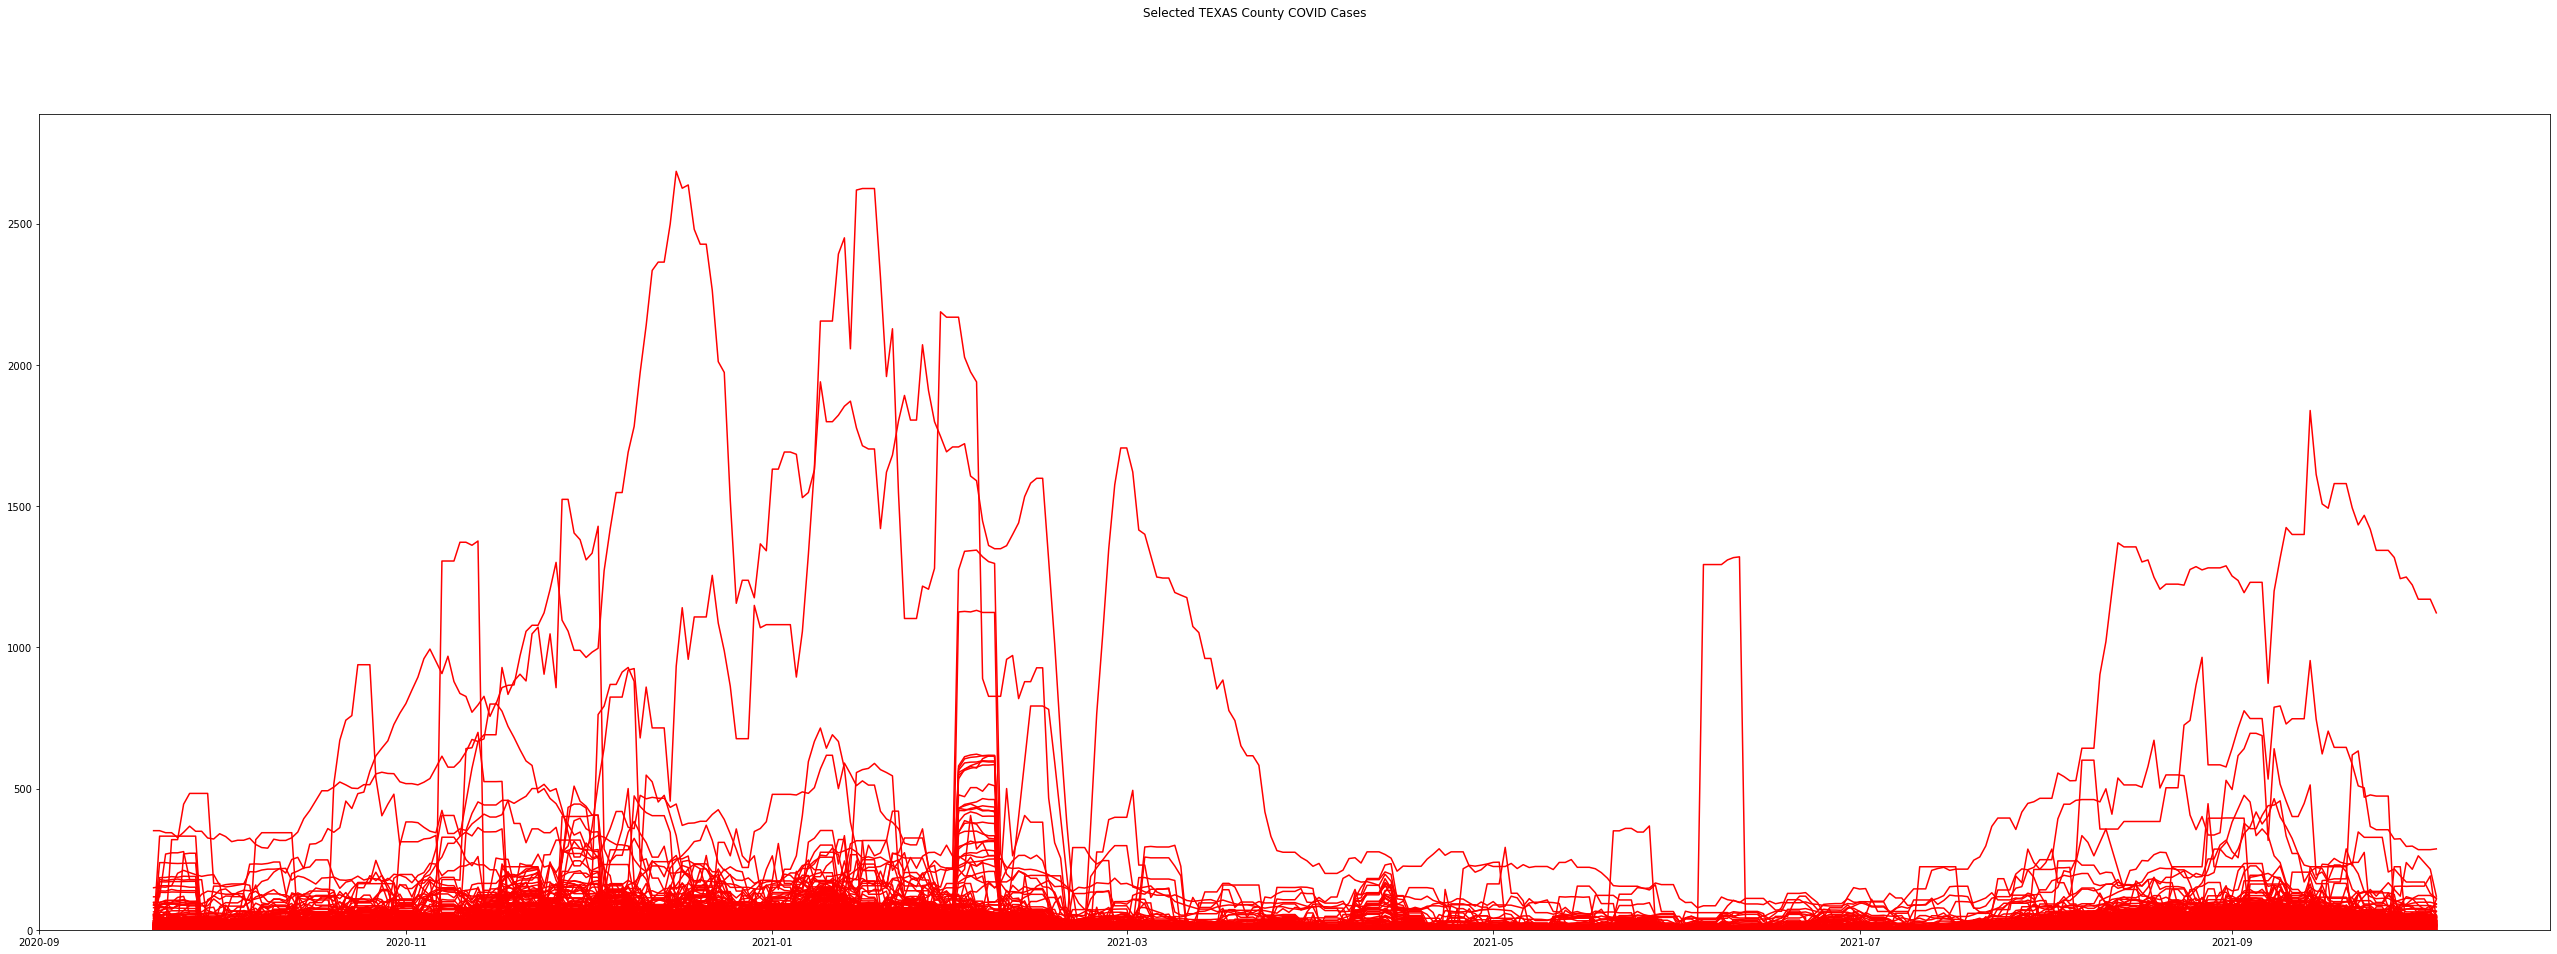

In [ ]:
l = df.index.values.tolist()
fig = plt.figure(figsize=(45,15))
#df
plt.plot(dat,df.T.diff().rolling(window=7).mean(),label= '7-day average Covid cases',color='red')

plt.ylim(0,)
#fig.tight_layout()
fig.suptitle('Selected TEXAS County COVID Cases')
#plt.savefig("TX_10_County_Covid_daily_update_7_AVG.png", dpi=60)
plt.show()

Final comparision

In [ ]:
print(df.shape)

(254, 388)


In [ ]:
#df.plot(style='o')

In [ ]:
#plt.scatter(df.T,dat,marker='*',c = 'r')
#plt.plot(df3.T,dat,marker='o',c = 'g')

In [ ]:
#plt.plot(dat,df.T,marker='*',c = 'r')
#plt.plot(dat,df3.T,marker='o',c = 'g')

In [177]:
from scipy.stats import wilcoxon,kruskal,friedmanchisquare,f_oneway,ttest_ind,ttest_rel,chisquare,kendalltau,spearmanr

# Computing the peak time for each county
s, p = f_oneway(df.sum(), df3.sum())
s,p

(1479.5795851318542, 8.500488417111213e-182)

In [178]:
alpha = 0.05
if p < alpha:
	print('Different distributions (reject H0)')
else:
	print('Same distributions (fail to reject H0, so H0 is accepted)')
s,p 

Different distributions (reject H0)


(1479.5795851318542, 8.500488417111213e-182)

In [179]:
from scipy.stats import wilcoxon,kruskal,friedmanchisquare,f_oneway,ttest_ind,ttest_rel,chisquare,kendalltau,spearmanr

# Computing the peak time for each county
s, p = ttest_rel(df.sum(), df3.sum())
s,p


(-41.554975931010645, 9.398011905029394e-145)

In [180]:
alpha = 0.05
if p < alpha:
	print('Different distributions (reject H0)')
else:
	print('Same distributions (fail to reject H0, so H0 is accepted)')
s,p 

Different distributions (reject H0)


(-41.554975931010645, 9.398011905029394e-145)